In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [407]:
data = pd.read_csv('eraser.csv')
data.columns=['shift', 'concs', 's1']
data = data.sort_values(by = 'shift')


In [408]:
conv_factor = 0.017839076356638374 

In [409]:
data['shift'] = data['shift'] *1e3 *conv_factor #now opt path in micro m
levelwithout = max(data['concs'])*2 
levelnoise = max(data['concs'])*2  + np.random.uniform(-np.sqrt(levelwithout), np.sqrt(levelwithout), len(data['concs']))

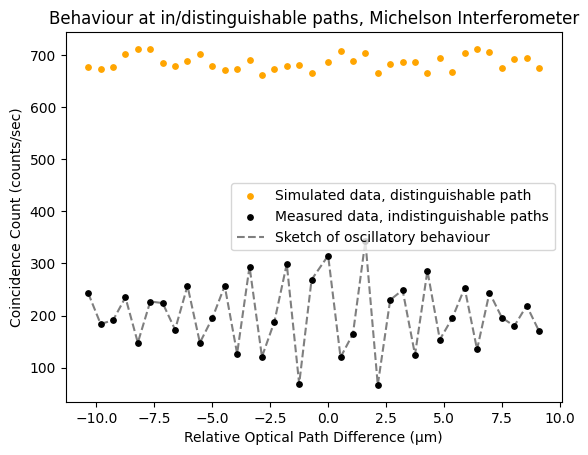

In [413]:
def gegecka(x, ampsin = 150, ampfreq = 4.45, phase = -1, mu = -.5, sigma = 5, offset = 25):
    sin = ampsin* np.sin(ampfreq * x - phase)
    gege = np.exp(np.divide(-(np.square(x + mu)), 2 * sigma ** 2))
    return np.multiply(sin,gege) + offset
xlin = np.linspace(-10, 10, 5000)
inicky = gegecka(xlin)
plt.scatter(data['shift'], levelnoise, s=15, color  = 'orange', label = 'Simulated data, distinguishable path' )
plt.scatter(data['shift'], data['concs'], s=15, color ='black', label = 'Measured data, indistinguishable paths')
plt.plot(data['shift'], data['concs'], color ='black',  linestyle = 'dashed' ,alpha =0.5, label ='Sketch of oscillatory behaviour')
# plt.plot(xlin, inicky)

plt.xlabel('Relative Optical Path Difference (μm)')
plt.ylabel('Coincidence Count (counts/sec)')
plt.title('Behaviour at in/distinguishable paths, Michelson Interferometer')
plt.legend()